<a href="https://colab.research.google.com/github/Manireddy69/C-progms/blob/main/DL_with_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from keras.datasets import mnist

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics = ['accuracy'])

In [ ]:
train_images= train_images.reshape((60000,28*28))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype('float32')/255

In [ ]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.8740 - loss: 0.4409
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9668 - loss: 0.1157
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9786 - loss: 0.0726
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9853 - loss: 0.0506
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9889 - loss: 0.0390


In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9765 - loss: 0.0767


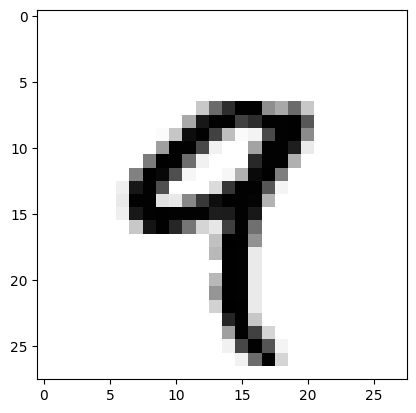

(784,)


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
digit = train_images[4]
plt.imshow(digit.reshape(28, 28), cmap=plt.cm.binary)
plt.show()
print(digit.shape)

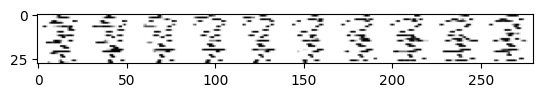

In [ ]:
my_slice = train_images[0:10]
plt.imshow(my_slice.reshape(28, 10 * 28), cmap=plt.cm.binary)
plt.show()

**Classifying Movie reviews: A binary classification example**

In [ ]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
train_data[0]
train_labels[0]


np.int64(1)

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ''.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
#Encoding the integer sequences into a binary matrix
import numpy as np
def vectorize_sequences(sequences,dimension = 10000):
  results = np.zeros((len(sequences),dimension))
  for i,sequence in enumerate(sequences):
    results[i,sequence] = 1
  return results

In [ ]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16,activation = 'relu',input_shape = (10000,)))
model.add(layers.Dense(16,activation = 'relu'))
model.add(layers.Dense(1,activation = 'sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer = 'rmsprop',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [ ]:
from keras import optimizers
from keras import losses
from keras import metrics
model.compile(optimizer = optimizers.RMSprop(learning_rate = 0.001),
              loss = losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])
history= model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size = 512,
                   validation_data = (x_val,y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 173ms/step - acc: 0.6921 - loss: 0.6068 - val_acc: 0.8549 - val_loss: 0.4157
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - acc: 0.8926 - loss: 0.3555 - val_acc: 0.8769 - val_loss: 0.3301
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 165ms/step - acc: 0.9176 - loss: 0.2662 - val_acc: 0.8868 - val_loss: 0.2883
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 147ms/step - acc: 0.9365 - loss: 0.2058 - val_acc: 0.8773 - val_loss: 0.3009
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - acc: 0.9462 - loss: 0.1696 - val_acc: 0.8847 - val_loss: 0.2836
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - acc: 0.9601 - loss: 0.1362 - val_acc: 0.8862 - val_loss: 0.2835
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - acc: 0.9615 - loss: 0.1240 - val_acc: 0.8819 - val_loss: 0.2983
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - acc: 0.9689 - loss: 0.1030 - val_acc: 0.8840 - val_loss: 0.3105
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - acc: 0.9

In [ ]:
history_dict = history.history
history_dict.keys()


dict_keys(['acc', 'loss', 'val_acc', 'val_loss'])

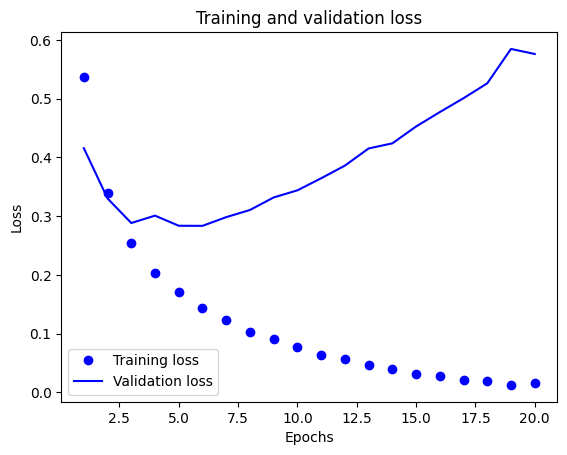

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc'] # Define acc here
epochs = range(1, len(acc)+1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

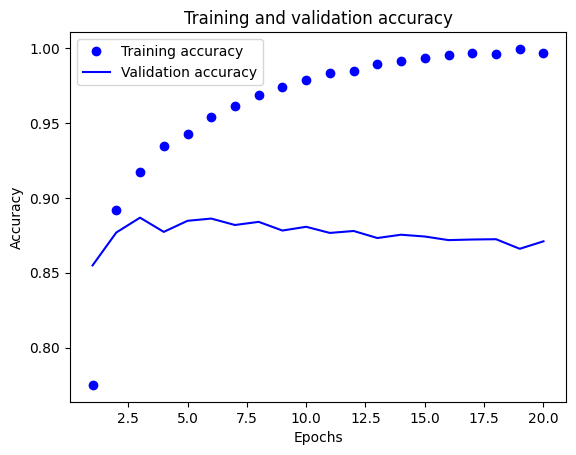

In [ ]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(acc_values)+1)
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16,activation = 'relu',input_shape = (10000,)))
model.add(layers.Dense(16,activation = 'relu'))
model.add(layers.Dense(1,activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',loss = 'binary_crossentropy',metrics = ['accuracy'])

model.fit(x_train,y_train,epochs = 4,batch_size = 512)
results = model.evaluate(x_test,y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.7283 - loss: 0.5549
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.9025 - loss: 0.2812
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9243 - loss: 0.2125
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9417 - loss: 0.1698
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8794 - loss: 0.2946


In [62]:
results

[0.2941015064716339, 0.8822799921035767]